<a href="https://colab.research.google.com/github/jyotz02/Learning/blob/master/Big%20Mart%20Sales/big_sales_mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns

In [0]:
test=pd.read_csv("/content/drive/My Drive/bigmart_test.csv")
train=pd.read_csv("/content/drive/My Drive/bigmart_train.csv")

In [0]:
train.take([0,1,2], axis = 0)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [0]:
test.shape

(5681, 11)

In [0]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


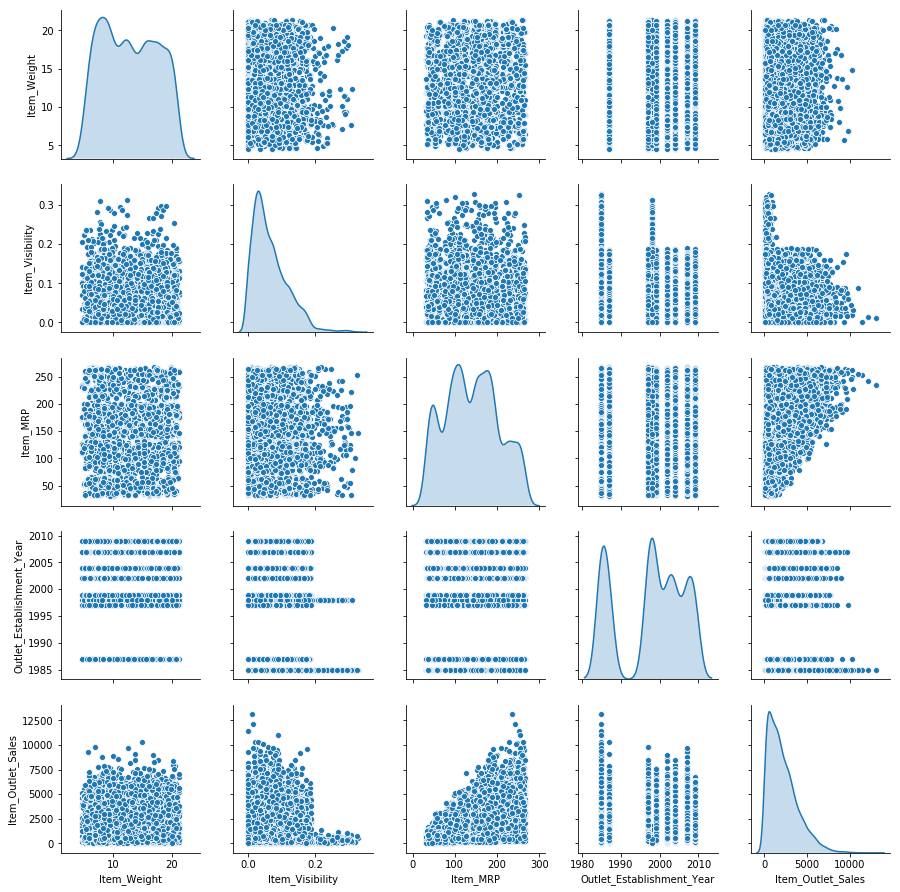

In [0]:
sns.pairplot(train,diag_kind='kde')

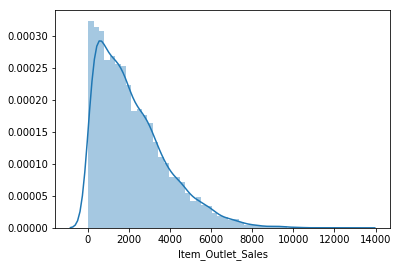

In [0]:
sns.distplot(train.Item_Outlet_Sales)

In [0]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [0]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

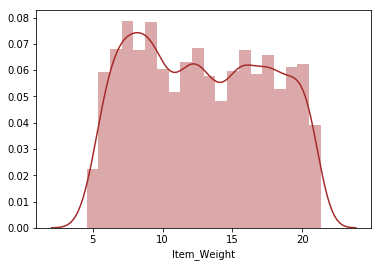

In [0]:
sns.distplot(train[pd.notnull(train.Item_Weight)]['Item_Weight'],color='brown')
plt.show()

## Observation

No shape identified in Item Weight and However, Item_weight has missing values

In [0]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

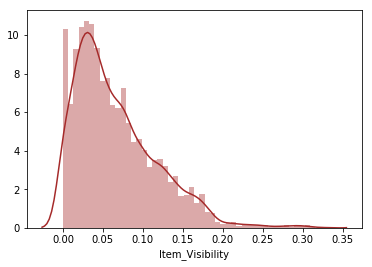

In [0]:
sns.distplot(train.Item_Visibility,color='brown')
plt.show()

In [0]:
train.Item_Visibility.describe() # item visibility with 0 is a prblm

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [0]:
#@title Item visibility has 0 values and has corresponding sales with it
#@ 


In [0]:
train[train.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.1872
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,NaN,Tier 2,Supermarket Type1,4604.6728
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,NaN,Tier 2,Supermarket Type1,5305.0944


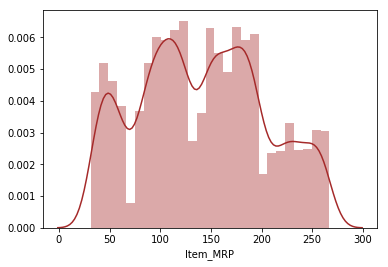

In [0]:
sns.distplot(train.Item_MRP,color='brown')
plt.show()

**Item MRP Shows 4 different distributions which means it needs treating/Transforming the values**

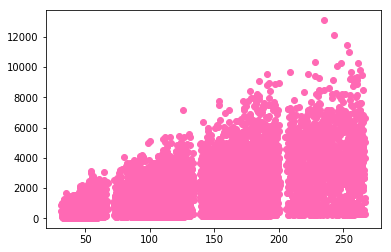

In [0]:
plt.scatter(train.Item_MRP,train.Item_Outlet_Sales,color='hotpink')

In [0]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
train.Item_MRP.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

**Univariate Cat Variable**

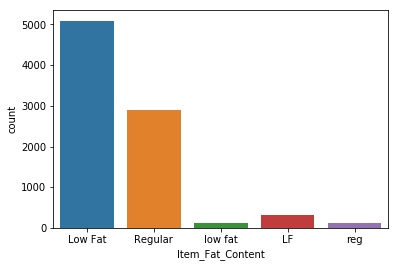

In [0]:
sns.countplot(x='Item_Fat_Content',data=train)

In [0]:
#for train
#train.Item_Fat_Content=train.Item_Fat_Content.replace('reg','Regular')
#train.Item_Fat_Content=train.Item_Fat_Content.replace('LF','Low Fat')
#train.Item_Fat_Content=train.Item_Fat_Content.replace('low fat','Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace(to_replace=['low fat','LF','reg'],value=['Low Fat','Low Fat','Regular'])

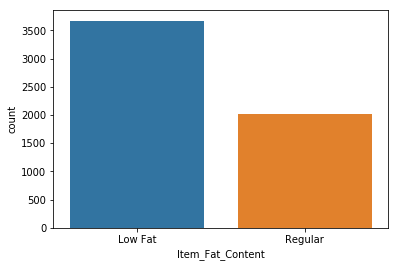

In [0]:
#for test
test.Item_Fat_Content=test.Item_Fat_Content.replace(to_replace=['low fat','LF','reg'],value=['Low Fat','Low Fat','Regular'])
sns.countplot(x='Item_Fat_Content',data=test)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


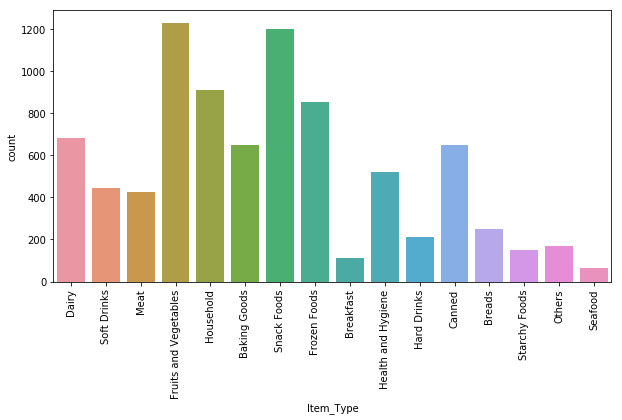

In [0]:
plt.figure(figsize=[10,5])
sns.countplot(x='Item_Type',data=train)
plt.xticks(rotation=90)
plt.show()

##  **Observation:
food and vegetables, snacks, frozen food are sold more**

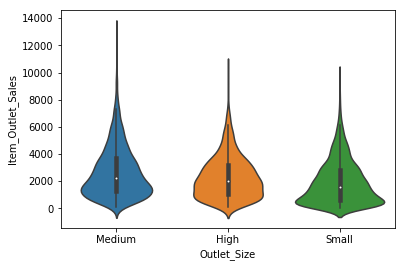

In [0]:
sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train) # x is categorical..y is numeric like boxplot
plt.show()

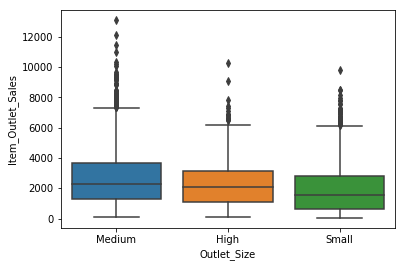

In [0]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)
plt.show()

## **Bivariate Analysis  --- Item visibility n sales**

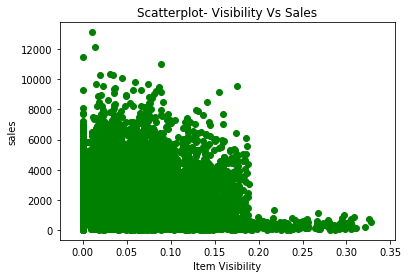

In [0]:
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales,color='green')
plt.xlabel('Item Visibility')
plt.ylabel('sales')
plt.title('Scatterplot- Visibility Vs Sales')
plt.show()

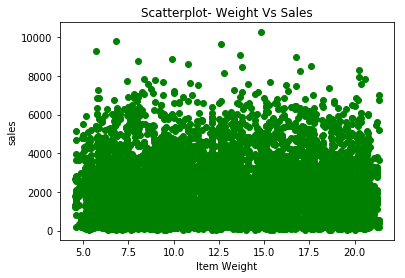

In [0]:
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales,color='green')
plt.xlabel('Item Weight')
plt.ylabel('sales')
plt.title('Scatterplot- Weight Vs Sales')
plt.show()

**No pattern**

# **Observartions so far **

1. visibility has 0 values
2. Item weight should not have 0 values
3. check NA values
4. Item MRP is grouped data(item_mrp/item weight)
5. Item identifier-- to decode

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


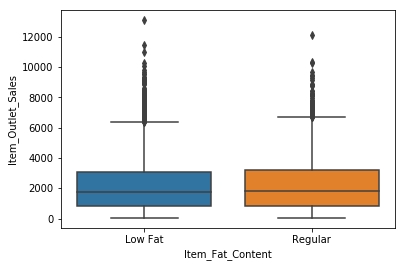

In [0]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)
plt.show()

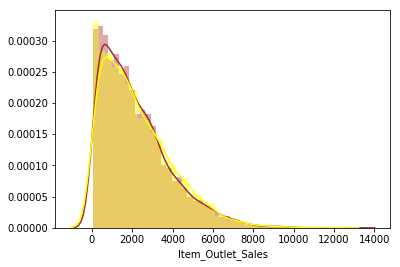

In [0]:
sns.distplot(train[train.Item_Fat_Content=='Low Fat']["Item_Outlet_Sales"],color='brown')
sns.distplot(train[train.Item_Fat_Content=='Regular']["Item_Outlet_Sales"],color='yellow')
plt.show()

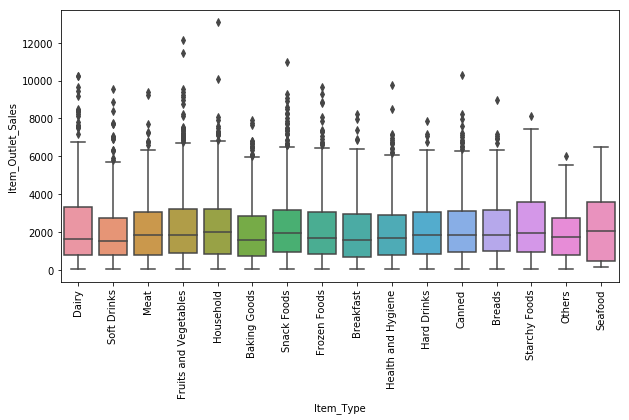

In [0]:
plt.figure(figsize=[10,5])
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)
plt.show()

In [0]:
df_most=pd.DataFrame(train[train.Item_Outlet_Sales>8000])

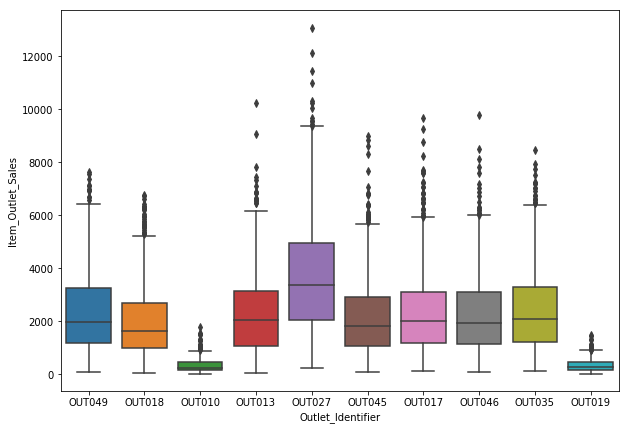

In [0]:
#identifying the outlet
plt.figure(figsize=[10,7])
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)
plt.show()

In [0]:
train[train.Outlet_Identifier=='OUT027']

#If an outlet is of medium size n belongs to Tier 3 city n is of supermarket type 3 then it will have max sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
62,FDF09,NaN,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
64,FDY45,NaN,Low Fat,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560
84,FDR12,NaN,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752
87,FDQ49,NaN,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230


In [0]:
train[train.Outlet_Identifier=='OUT027']['Item_Type'].nunique()

16

In [0]:
train[train.Outlet_Identifier=='OUT010']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
90,FDW20,20.750,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
122,FDB14,20.250,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
133,FDS52,8.890,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,1998,NaN,Tier 3,Grocery Store,101.2016
139,NCN07,18.500,Low Fat,0.056816,Others,132.1284,OUT010,1998,NaN,Tier 3,Grocery Store,263.6568
174,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,NaN,Tier 3,Grocery Store,345.5502


In [0]:
train[(train.Outlet_Size=='Small') & (train.Outlet_Type=='Grocery Store')]["Item_Outlet_Sales"].describe()

count     528.000000
mean      340.329723
std       249.979449
min        33.955800
25%       153.633350
50%       265.321300
75%       460.733600
max      1482.070800
Name: Item_Outlet_Sales, dtype: float64

In [0]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## **Observations Store Type

9Store Type: Small and Grocery

 1. Max Sales is 1500 where as min is 33**

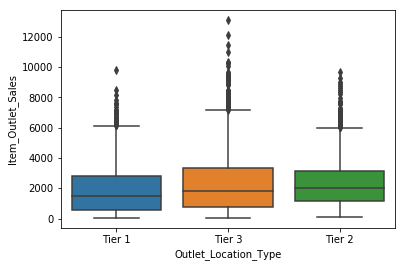

In [0]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)
plt.show()

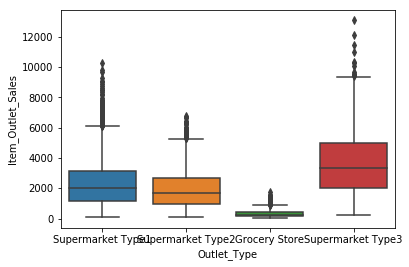

In [0]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)
plt.show()

In [0]:
train[train.Outlet_Type=='Supermarket Type3']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
62,FDF09,NaN,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
64,FDY45,NaN,Low Fat,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560
84,FDR12,NaN,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752
87,FDQ49,NaN,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230


In [0]:
train.Outlet_Size.fillna(value="Medium",inplace=True)

In [0]:
test.Outlet_Size.fillna(value="Medium",inplace=True)

In [0]:
train[train.Item_Identifier=='FDX07']['Item_Weight']

3       19.2
1491    19.2
2459    19.2
3089    19.2
5906    19.2
7735     NaN
Name: Item_Weight, dtype: float64

In [0]:
# Item Weight - Missing values
#train.Item_Weight.fillna(value=,inplace=True)

In [0]:
train.groupby('Item_Identifier').Item_Weight.mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [0]:
'''meanvals=[]
for i in range(len(train)):
  meanvals.append(train[train.Item_Identifier==i]["Item_Weight"].mean())
  train.Item_Weight.fillna(value=meanvals[i],inplace=True)
  '''

In [0]:
train.Item_Weight.isnull().sum()

1463

In [0]:
train["Item_Weight"]=train.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
#train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [0]:
test["Item_Weight"]=test.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [0]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
# 4 missing values in train
train[pd.isnull(train.Item_Weight)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [0]:
# Frozen food
train[train.Item_Type=='Baking Goods']["Item_Weight"].describe()

count    647.000000
mean      12.285317
std        4.749789
min        4.880000
25%        8.235000
50%       11.650000
75%       15.700000
max       20.850000
Name: Item_Weight, dtype: float64

In [0]:
#train[train.Item_Identifier=='FDN52'].loc("Item_Weight").fillna(value=12.85,inplace=True)
train.iloc[927,1]=12.85
train.iloc[1922,1]=13.15
train.iloc[4187,1]=13.35
train.iloc[5022,1]=11.65

In [0]:
test[pd.isnull(test.Item_Weight)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,Low Fat,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


In [0]:
test["Item_Weight"]=test.groupby('Item_Type')["Item_Weight"].transform(lambda x:x.fillna(x.median()))

In [0]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## **Feature Engg**

Hints
1. Item Id-4
2. Price per unit --1
3. Item Type-3
4. Establishment year-2

In [0]:
train.Item_Identifier[0][:2]

'FD'

In [0]:
itemId=[]
for i in range(0,len(train.Item_Identifier)):
  itemId.append(train.Item_Identifier[i][:2])
train["Item_Category"]=itemId

In [0]:
itemIdTest=[]
for i in range(0,len(test.Item_Identifier)):
  itemIdTest.append(test.Item_Identifier[i][:2])
test["Item_Category"]=itemIdTest

In [0]:
#test["Item_Weight"]=test.groupby('Item_Identifier')["Item_Weight"].transform(lambda x: if x.replace(0,x.mean())


In [0]:
train["Existence_Years"]=2013-train.Outlet_Establishment_Year
test["Existence_Years"]=2013-test.Outlet_Establishment_Year

In [0]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [0]:
train['Item_Visibility'].replace(to_replace=0,value=0.053931,inplace=True)

In [0]:
test['Item_Visibility'].replace(to_replace=0,value=0.053931,inplace=True)

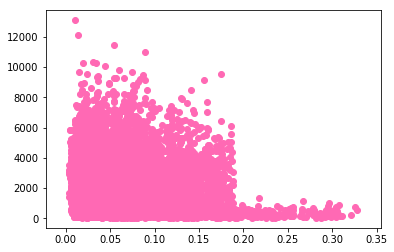

In [0]:
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales,color='hotpink')

In [0]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [0]:
# for zero values in item weight

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Category                8523 non-null object
Existence_Years              8523 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 932.3+ KB


In [0]:
#train.Item_Weight=train.Item_Weight.astype("float")

In [0]:
#train.Item_Weight.replace(0,11,inplace=True)

In [0]:
#train.info()

In [0]:
train["Price_per_unit"]=train.Item_MRP/train.Item_Weight


In [0]:
test.Item_Weight=test.Item_Weight.astype("float")

In [0]:
test.Item_Weight.describe()

In [0]:
#test.Item_Weight.replace(0,10.5,inplace=True)

In [0]:
#train[train.Item_Weight==np.nan]

In [0]:
test["Price_per_unit"]=test.Item_MRP/test.Item_Weight

In [0]:
train.shape

(8523, 15)

In [0]:
test.shape

(5681, 14)

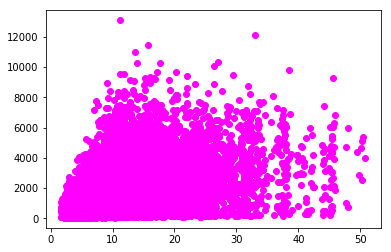

In [0]:
plt.scatter(train.Price_per_unit,train.Item_Outlet_Sales,color='magenta')

In [0]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence_Years,Price_per_unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15,9.484115
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512


In [0]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [0]:
#Perishables
Perishable=['Dairy',  'Meat', 'Fruits and Vegetables','Baking Goods', 'Snack Foods', 'Frozen Foods','Breakfast','Breads', 'Seafood']

In [0]:
# Where it matches the perishables else not perishables
  
train["Item_Type_Category"]=np.where(train.Item_Type.isin(Perishable),"Perishable","Non Perishable")
test["Item_Type_Category"]=np.where(test.Item_Type.isin(Perishable),"Perishable","Non Perishable")

In [0]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence_Years,Price_per_unit,Item_Type_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581,Non Perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457,Perishable
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15,9.484115,Perishable
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512,Non Perishable


# MODEL BUILDING

In [0]:
# To del
# Item Id, Outlet Identifier, Outlet Year
new_train=train.drop(["Item_Type","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1)

In [0]:
new_test=test.drop(["Item_Type","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1)

In [0]:
new_train.shape

(8523, 12)

In [0]:
new_test.shape

(5681, 11)

**LABEL ENCODING:**
 Value follows certain order..however we see that there is no order n hence it is imperative to apply OHE(pd.get_dummies)

In [0]:
dummytrain=pd.get_dummies(new_train)
dummytest=pd.get_dummies(new_test)

In [0]:
# Applying standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
dummytrain.shape

(8523, 23)

In [0]:
dummytest.shape

(5681, 22)

In [0]:
scaled_train=pd.DataFrame(sc.fit_transform(dummytrain),columns=dummytrain.columns)

In [0]:
scaled_test=pd.DataFrame(sc.fit_transform(dummytest),columns=dummytest.columns)

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf=RandomForestRegressor()

In [0]:
scaled_train.info()

In [0]:
rf.fit(scaled_train.drop("Item_Outlet_Sales",axis=1),scaled_train.Item_Outlet_Sales)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
pred=rf.predict(scaled_test)

In [0]:
pred   

array([-1.76942887e-01, -4.73283280e-01, -9.67327002e-01, ...,
       -1.01150614e-03,  1.93122931e+00, -2.93879313e-01])

###  with random forest rmse-- 1269

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [0]:
gb.fit(scaled_train.drop("Item_Outlet_Sales",axis=1),scaled_train.Item_Outlet_Sales)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
ad.fit(scaled_train.drop("Item_Outlet_Sales",axis=1),scaled_train.Item_Outlet_Sales) # ada boost rmse-- 1373.2045086629319.

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [0]:
pred_gb=gb.predict(scaled_test)

In [0]:
pred_ad=ad.predict(scaled_test)

In [0]:
#Inverse transform
sm=StandardScaler()
sales=sm.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))
org_sales=sm.inverse_transform(pred_ad)

In [0]:
org_sales 

array([1995.51544746, 1844.0043201 , 2828.43198044, ..., 2460.62181073,
       4014.18097033, 1699.71824593])

### with gradient boost rmse-- 1157.4171624467

In [0]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, "Outlet_Identifier":test.Outlet_Identifier,"Item_Outlet_Sales":org_sales})

In [0]:
from google.colab import files
solution.to_csv("BigSales_ada.csv", index=False)
files.download("BigSales_ada.csv")